<a href="https://colab.research.google.com/github/Faza20-lab/Projet_stats/blob/main/Projet_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preset**

In [1]:
!pip install netCDF4

  Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.9 kB)
  Using cached cftime-1.6.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (8.7 kB)
Using cached netcdf4-1.7.3-cp311-abi3-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (9.5 MB)
Using cached cftime-1.6.5-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (1.6 MB)


In [137]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import scipy.stats as st
from scipy.stats import norm, gamma, beta, shapiro, kstest, genextreme, genpareto, probplot
import statsmodels.api as sm
from statsmodels.stats.diagnostic import anderson_statistic
from scipy.stats import beta as beta_dist

In [76]:
from google.colab import drive
drive.mount('/content/drive')

file_prec = '/content/drive/MyDrive/data/ERA5_prec_daily_1940_2023_FR_brittany.nc'
ds = xr.open_dataset(file_prec)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Visualisation des données:**

## Visualisation des données de precipitations et définition de X:

In [4]:
ds.sizes

Frozen({'Latitude': 12, 'Longitude': 14, 'time': 30449})

In [5]:
print(ds['time'])

<xarray.DataArray 'time' (time: 30449)> Size: 244kB
array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', ..., '2023-05-11T00:00:00.000000000',
       '2023-05-12T00:00:00.000000000', '2023-05-13T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 244kB 1940-01-01 1940-01-02 ... 2023-05-13
    height   float64 8B ...


In [146]:
ds.time.values[:100]

array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', '1940-01-04T00:00:00.000000000',
       '1940-01-05T00:00:00.000000000', '1940-01-06T00:00:00.000000000',
       '1940-01-07T00:00:00.000000000', '1940-01-08T00:00:00.000000000',
       '1940-01-09T00:00:00.000000000', '1940-01-10T00:00:00.000000000',
       '1940-01-11T00:00:00.000000000', '1940-01-12T00:00:00.000000000',
       '1940-01-13T00:00:00.000000000', '1940-01-14T00:00:00.000000000',
       '1940-01-15T00:00:00.000000000', '1940-01-16T00:00:00.000000000',
       '1940-01-17T00:00:00.000000000', '1940-01-18T00:00:00.000000000',
       '1940-01-19T00:00:00.000000000', '1940-01-20T00:00:00.000000000',
       '1940-01-21T00:00:00.000000000', '1940-01-22T00:00:00.000000000',
       '1940-01-23T00:00:00.000000000', '1940-01-24T00:00:00.000000000',
       '1940-01-25T00:00:00.000000000', '1940-01-26T00:00:00.000000000',
       '1940-01-27T00:00:00.000000000', '1940-01-28

In [8]:
print(ds.Latitude.values)
print(ds.Longitude.values)

[49.   48.75 48.5  48.25 48.   47.75 47.5  47.25 47.   46.75 46.5  46.25]
[-4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25 -2.
 -1.75 -1.5 ]


In [53]:
da = ds['pr'].isel(time=0)   # sélection du premier pas de temps (un jour = une carte)
df = da.to_dataframe().reset_index() # pandas dataframe

In [54]:
print(df.head())

   Latitude  Longitude       time   lon   lat  height  pr
0      49.0      -4.75 1940-01-01 -4.75  49.0     0.0 NaN
1      49.0      -4.50 1940-01-01 -4.50  49.0     0.0 NaN
2      49.0      -4.25 1940-01-01 -4.25  49.0     0.0 NaN
3      49.0      -4.00 1940-01-01 -4.00  49.0     0.0 NaN
4      49.0      -3.75 1940-01-01 -3.75  49.0     0.0 NaN


In [55]:
print(da)

<xarray.DataArray 'pr' (Latitude: 12, Longitude: 14)> Size: 672B
array([[         nan,          nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan,          nan,
                 nan,          nan,          nan, 0.000000e+00],
       [         nan,          nan,          nan,          nan,          nan,
                 nan, 0.000000e+00,          nan,          nan,          nan,
                 nan,          nan,          nan, 0.000000e+00],
       [         nan, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 7.642323e-09],
       [         nan,          nan, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00, 7.642323e-09,
        1.913320e-08, 3.443154e-08, 1.913320e-08, 1.529834e-08],
       [         nan,          nan, 0.000000e+00, 0

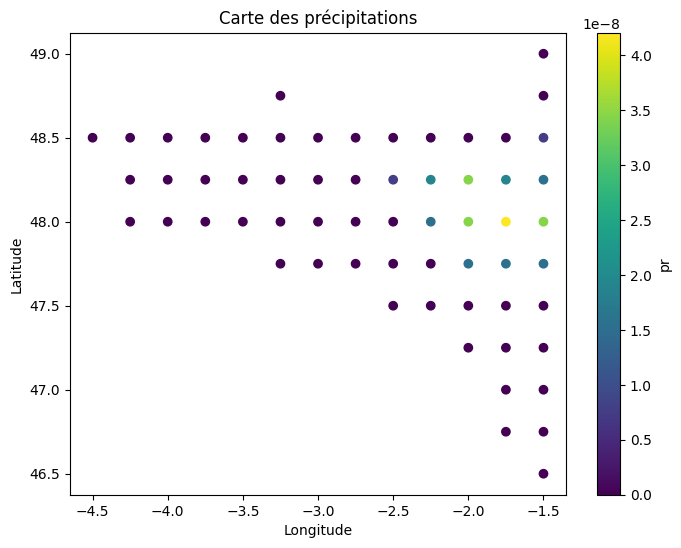

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(df["Longitude"], df["Latitude"], c=df["pr"])
plt.colorbar(label="pr")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Carte des précipitations")
plt.show()

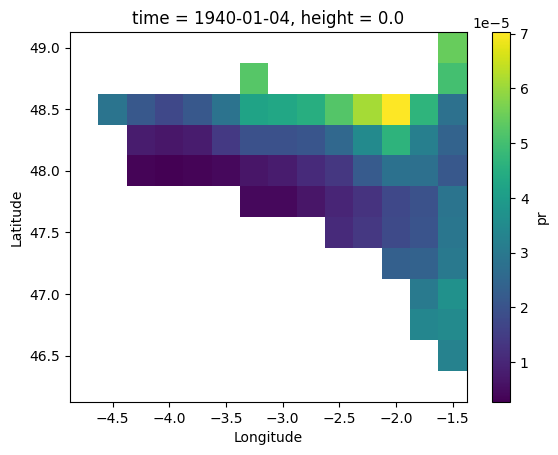

In [57]:
ds.pr[:,:,3].plot() # trace la variable pour à l’indice 3

In [58]:
ds_djf = ds.sel(time=ds['time'].dt.month.isin([1, 2, 12]))  # sélection des mois DJF
print(ds_djf)
ds_djf.sizes # dimensions du dataset

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    pr         (Latitude, Longitude, time) float32 5MB nan nan nan ... nan nan


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

In [59]:
# Somme quotidienne des précipitations sur toute la zone en mois DJF
somme_quotidienne_pr_djf = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])  # somme spatiale
print(somme_quotidienne_pr_djf)

X = somme_quotidienne_pr_djf
print(len(X))  # nombre de jours

<xarray.DataArray 'pr' (time: 7550)> Size: 30kB
array([2.7539755e-07, 0.0000000e+00, 3.9131618e-03, ..., 1.3772695e-05,
       2.4685729e-05, 2.1683841e-03], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


In [60]:
#conversion de kg/m²/s en mm-1
seconds_per_day = 24 * 60 * 60  # 86400

X_mm_per_day = X * seconds_per_day # x(1000/1000)

# Mettre à jour le DataArray avec une nouvelle unité
X = X_mm_per_day.rename("pr_mm_per_day")
X.attrs['units'] = 'mm/day'
X.attrs['description'] = 'Précipitation journalière convertie de kg/m²/s → mm/j'

print(X)

<xarray.DataArray 'pr_mm_per_day' (time: 7550)> Size: 30kB
array([2.3794349e-02, 0.0000000e+00, 3.3809717e+02, ..., 1.1899608e+00,
       2.1328471e+00, 1.8734839e+02], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
Attributes:
    units:        mm/day
    description:  Précipitation journalière convertie de kg/m²/s → mm/j


X correspond au cumul des précipitations sur la journée chaque jour.

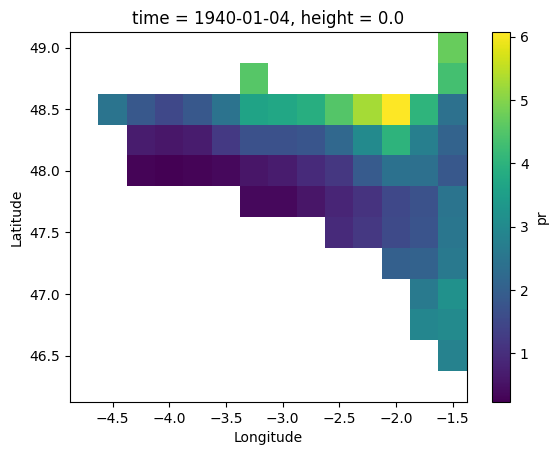

In [51]:
ds_djf['pr'] = ds['pr'] * 86400  # 86400 secondes = 1 jour
ds_djf.pr[:,:,3].plot()

## Visualisation des données de vents et définition de Y:

In [61]:
file_wind = '/content/drive/MyDrive/data/ERA5_wind_daily_1940_2023_FR_brittany.nc'
ds2 = xr.open_dataset(file_wind)

In [62]:
ds2.head()

<xarray.Dataset> Size: 708B
Dimensions:    (Latitude: 5, Longitude: 5, time: 5)
Coordinates:
  * Latitude   (Latitude) float64 40B 49.0 48.75 48.5 48.25 48.0
  * Longitude  (Longitude) float64 40B -4.75 -4.5 -4.25 -4.0 -3.75
  * time       (time) datetime64[ns] 40B 1940-01-01 1940-01-02 ... 1940-01-05
    lon        (Longitude) float64 40B ...
    lat        (Latitude) float64 40B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 500B ...

In [147]:
ds2.time.values[:100] # ! les fichiers contiennent tous les mois de chaque année pas que DJF

array(['1940-01-01T00:00:00.000000000', '1940-01-02T00:00:00.000000000',
       '1940-01-03T00:00:00.000000000', '1940-01-04T00:00:00.000000000',
       '1940-01-05T00:00:00.000000000', '1940-01-06T00:00:00.000000000',
       '1940-01-07T00:00:00.000000000', '1940-01-08T00:00:00.000000000',
       '1940-01-09T00:00:00.000000000', '1940-01-10T00:00:00.000000000',
       '1940-01-11T00:00:00.000000000', '1940-01-12T00:00:00.000000000',
       '1940-01-13T00:00:00.000000000', '1940-01-14T00:00:00.000000000',
       '1940-01-15T00:00:00.000000000', '1940-01-16T00:00:00.000000000',
       '1940-01-17T00:00:00.000000000', '1940-01-18T00:00:00.000000000',
       '1940-01-19T00:00:00.000000000', '1940-01-20T00:00:00.000000000',
       '1940-01-21T00:00:00.000000000', '1940-01-22T00:00:00.000000000',
       '1940-01-23T00:00:00.000000000', '1940-01-24T00:00:00.000000000',
       '1940-01-25T00:00:00.000000000', '1940-01-26T00:00:00.000000000',
       '1940-01-27T00:00:00.000000000', '1940-01-28

In [150]:
ds2_djf = ds2.sel(time=ds2['time'].dt.month.isin([1, 2, 12]))  # sélection des mois DJF
print(ds2_djf)
ds2_djf.sizes

<xarray.Dataset> Size: 5MB
Dimensions:    (Latitude: 12, Longitude: 14, time: 7550)
Coordinates:
  * Latitude   (Latitude) float64 96B 49.0 48.75 48.5 48.25 ... 46.75 46.5 46.25
  * Longitude  (Longitude) float64 112B -4.75 -4.5 -4.25 ... -2.0 -1.75 -1.5
  * time       (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    lon        (Longitude) float64 112B ...
    lat        (Latitude) float64 96B ...
    height     float64 8B ...
Data variables:
    sfcWind    (Latitude, Longitude, time) float32 5MB ...


Frozen({'Latitude': 12, 'Longitude': 14, 'time': 7550})

Y correspond à la moyenne des vents sur la région chaque jour

In [64]:
# Moyenne quotidienne du vent de surface sur la zone (DJF)
mean_quotidienne_sfcWind_djf = ds2_djf['sfcWind'].mean(dim=['Latitude', 'Longitude'])
print(mean_quotidienne_sfcWind_djf)

Y = mean_quotidienne_sfcWind_djf
print(len(Y))    # nombre de jours

<xarray.DataArray 'sfcWind' (time: 7550)> Size: 30kB
array([7.83476  , 7.0278034, 6.5031533, ..., 8.036705 , 7.9032116,
       7.3788795], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 60kB 1940-01-01 1940-01-02 ... 2023-02-28
    height   float64 8B ...
7550


# **Etude des précipitations (X)**

## **1. Distribution normale**

Paramètres normale : 154.75986 232.3497
Log-vraisemblance maximale : -51847.22507942568
AIC = 103698.45015885137


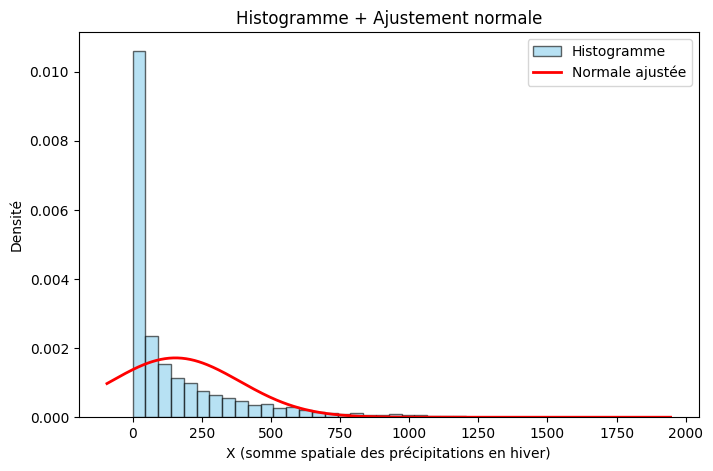

In [66]:
# Ajustement à la loi normale
mu, sigma = norm.fit(X)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(X, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("X (somme spatiale des précipitations en hiver)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(X, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)


In [67]:
# Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(X)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# KS (Kolmogorov-Smirnov)
ks_stat, ks_p = kstest(X, 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)

Test Shapiro-Wilk :
  statistique = 0.693839948185359
  p-value     = 2.6007504494388917e-79 

Test KS (paramètres estimés) :
  statistique = 0.25268329868908956
  p-value     = 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7550.
  res = hypotest_fun_out(*samples, **kwds)


**Principe du graphique Quantile-Quantile:**
+ *Axe Horizontal - Quantiles Théoriques:*
 Représente les quantiles théoriques de la distribution normale standard (ou de la distribution normale ajustée aux données).

+ *Axe Vertical - Quantiles réels :* Valeurs Ordonnées
 Représente les valeurs observées (ensemble de données), triées par ordre croissant.

Chaque point bleu représente une observation (Y) et le quantile théorique correspondant (X) qu'il devrait avoir si les données suivaient parfaitement la loi normale ajustée.

Si les données suivaient parfaitement la loi normale, tous les points devraient se situer exactement sur la droite y=x, car les quantiles théoriques seraient égaux aux quantiles observés.



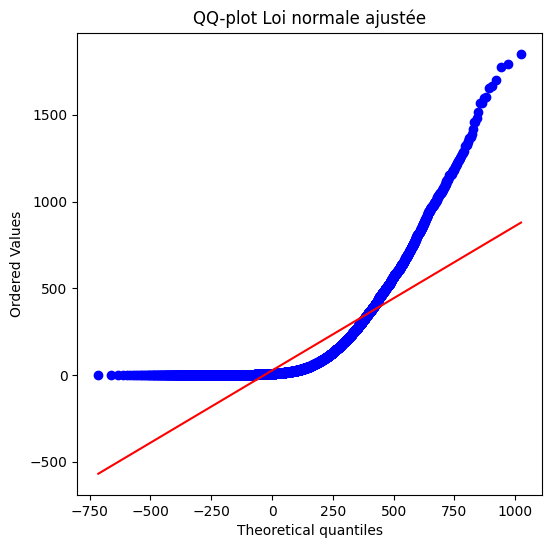

In [68]:
# Diagramme Quantile-Quantile de la normale
plt.figure(figsize=(6,6))
st.probplot(X, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

**Analyse du QQ-Plot de la normale**

Le QQ-plot montre un écart significatif par rapport à l'alignement parfait, indiquant que la distribution des données n'est pas normale :

+ Centre de la Distribution : les points suivent presque la droite, on a donc un comportement quasi-normale au centre.

+ Queue Gauche (Petites Valeurs) : Pas de valeurs négatives dans les précipitations alors que la loi normale centrée en µ (~145mm) en prévoit.

+ Queue Droite (Grandes Valeurs) : Les points bleus s'envolent au-dessus de la ligne rouge. Cela montre qu'il y a des valeurs extrêmes positives. Ces valeurs sont beaucoup plus élevées que ce qu'une distribution normale classique permettrait.

**Conclusion :** La distribution est fortement asymétrique et possède des queues plus épaisses que la distribution normale, ce qui invalide l'hypothèse de normalité pour cet ensemble de données.

## **2. Distribution Gamma**

Paramètres gamma : 0.3968705718016051 397.2107
Log-vraisemblance maximale : -41710.23529045235
AIC = 83424.4705809047


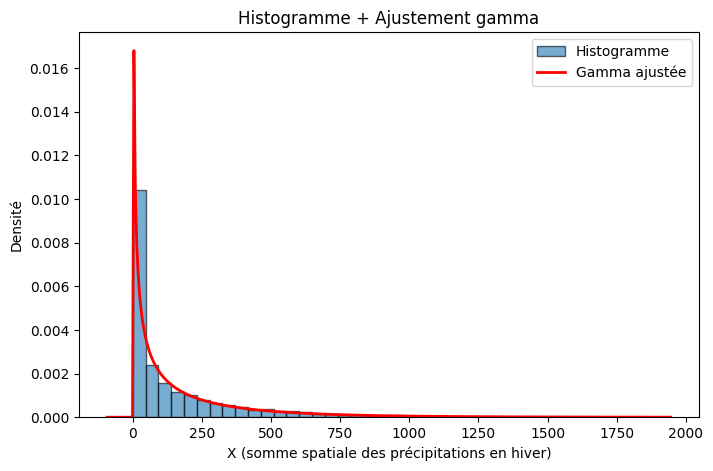

In [81]:
# Garder uniquement les valeurs strictement positives
X_pos = X[X > 0]

# Ajustement à la loi Gamma
alpha, loc, beta = gamma.fit(X_pos, floc=0)        # estimation des paramètres
print("Paramètres gamma :", alpha, beta)

# Histogramme + densité gamma ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(X_pos, bins=40, density=True, alpha=0.6,
         edgecolor='black', label="Histogramme")
# Log-vraisemblance
logL_gamma = np.sum(gamma.logpdf(X_pos, alpha, loc=0, scale=beta))
print("Log-vraisemblance maximale :", logL_gamma)

# AIC (k = 2 paramètres : alpha, beta)
AIC_gamma = 2*2 - 2*logL_gamma
print("AIC =", AIC_gamma)

# Courbe théorique gamma ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, gamma.pdf(xx, alpha, loc=0, scale=beta),
         'r-', lw=2, label="Gamma ajustée")

plt.xlabel("X (somme spatiale des précipitations en hiver)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement gamma")
plt.legend()
plt.show()


Statistique KS : 0.025767405997928372
p-value : 0.00010435381372939781


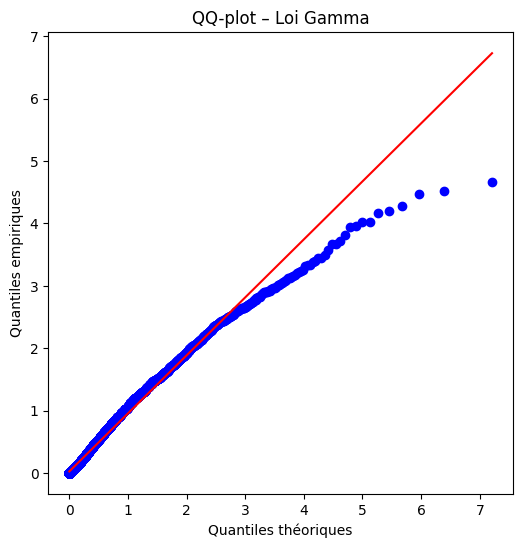

In [80]:
# Test de Kolmogorov–Smirnov pour la loi Gamma ajustée
D, p_value = kstest(X_pos, 'gamma', args=(alpha, 0, beta))

print("Statistique KS :", D)
print("p-value :", p_value)

# Données standardisées (enlever scale)
X_std = X_pos / beta

# QQ-plot Gamma (scale = 1)
plt.figure(figsize=(6,6))
probplot(X_std, dist=gamma, sparams=(alpha,), plot=plt)
plt.title("QQ-plot – Loi Gamma")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles empiriques")
plt.show()


Le QQ-plot montre un bon alignement des quantiles centraux, indiquant que la loi Gamma décrit correctement la partie principale des données.
En revanche, les écarts marqués dans la queue droite révèlent une sous-estimation des événements extrêmes, fréquente pour les précipitations intenses.

In [82]:
# Bootstrap pour la loi Gamma: ré-échantillonner X_pos et ré-estimer les paramètres Gamma
# Paramètres
n_boot = 1000
alpha_boot = []
beta_boot = []

# Bootstrap
for _ in range(n_boot):
    Xb = np.random.choice(X_pos, size=len(X_pos), replace=True)  # ré-échantillonnage
    a, loc, b = gamma.fit(Xb, floc=0)                             # ajustement gamma
    alpha_boot.append(a)
    beta_boot.append(b)

alpha_boot = np.array(alpha_boot)
beta_boot = np.array(beta_boot)

In [83]:
# Intervalles de confiance (95 %)
alpha_ci = np.percentile(alpha_boot, [2.5, 97.5])
beta_ci  = np.percentile(beta_boot,  [2.5, 97.5])

print("IC 95% alpha :", alpha_ci)
print("IC 95% beta  :", beta_ci)

IC 95% alpha : [0.38777435 0.40694469]
IC 95% beta  : [381.65741577 413.36828156]


## **3. Distribution Beta**

Paramètres beta : 0.5156684854540652 108.17750526493276
Log-vraisemblance maximale : -45330.30382846859
AIC = 90664.60765693718


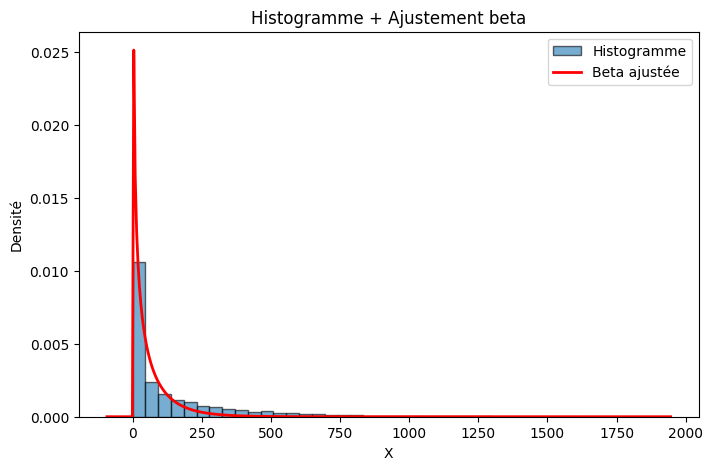

In [98]:
# Tentative d'ajustement Beta directement sur X (comme la normale)
a, b, loc, scale = beta.fit(X)
print("Paramètres beta :", a, b)

# Histogramme + densité beta ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(X, bins=40, density=True, alpha=0.6,
         edgecolor='black', label="Histogramme")

# Log-vraisemblance
logL_beta = np.sum(beta.logpdf(X, a, b, loc=loc, scale=scale))
print("Log-vraisemblance maximale :", logL_beta)

# AIC
AIC_beta = 2*2 - 2*logL_beta
print("AIC =", AIC_beta)

# Courbe théorique beta ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, beta.pdf(xx, a, b, loc=loc, scale=scale),
         'r-', lw=2, label="Beta ajustée")

plt.xlabel("X")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement beta")
plt.legend()
plt.show()


Statistique KS : 0.2300712918483221
p-value : 0.0


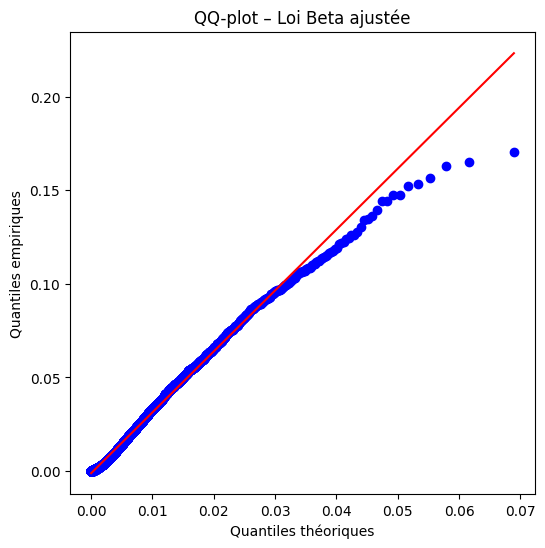

In [95]:
# Test KS pour la loi Beta ajustée
D, p_value = kstest(X, 'beta', args=(a, b, loc, scale))

print("Statistique KS :", D)
print("p-value :", p_value)

# Recentrer / re-scaler X pour revenir sur [0,1]
X_std = (X - loc) / scale

# QQ-plot Beta
plt.figure(figsize=(6,6))
probplot(X_std, dist=beta, sparams=(a, b), plot=plt)
plt.title("QQ-plot – Loi Beta ajustée")
plt.xlabel("Quantiles théoriques")
plt.ylabel("Quantiles empiriques")
plt.show()


Le QQ-plot montre un bon accord pour les quantiles centraux, ce qui indique que la loi Beta ajustée reproduit correctement la masse principale des données.
Les écarts visibles dans la queue droite traduisent toutefois une mauvaise représentation des valeurs extrêmes, confirmant les limites de ce modèle pour les fortes précipitations.

On s'intéressera donc, ensuite, aux queues de distribution

# **Etude des queues de distribution pour les précipitations**

## Définition des variables:

On définit quatre variables :

1) **WinterPI :** la somme des précipitations sur tout l’hiver DJF (Décembre-Janvier-Février) en mm, calculée sur toutes les latitudes et longitudes.

2) **Somme_mois :** la somme des précipitations pour chaque mois de l’hiver DJF en mm, calculée sur toutes les latitudes et longitudes.

3) **pr_max_an :** la précipitation maximale observée sur un jour de chaque hiver (DJF), en mm, également intégrée sur toutes les latitudes et longitudes.

4) **pr_max_mois :** la valeur maximale de précipitation enregistrée sur un jour pour chaque mois, exprimée en mm et calculée en intégrant toutes les latitudes et longitudes.

In [103]:
# Somme journalière spatiale
somme_quotidienne_pr_djf = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])

# Somme totale par hiver
annee_hiver = ds_djf['time.year'].where(ds_djf['time.month'] != 12, ds_djf['time.year'] + 1)
WinterPI = ds_djf['pr'].groupby(annee_hiver).sum(dim=['time', 'Latitude', 'Longitude'])
WinterPI = WinterPI.assign_coords(year=np.unique(annee_hiver.values))

# Somme mensuelle
Somme_mois = ds_djf['pr'].groupby('time.month').sum(dim=['Latitude', 'Longitude'])

# maximum par an

pr_max_an = ds_djf['pr'].sum(dim=['Latitude','Longitude']).groupby('time.year').max()

# Affichage final
print("\n=== WinterPI (somme d'un hiver DJF) ===\n", WinterPI)
print("Nombre d'hivers :", len(WinterPI))

print("\n=== Somme par mois (DJF) ===\n", Somme_mois)
print("Nombre de mois :", len(Somme_mois))

print("\n=== Max par mois (précipitation journalière max) ===\n",pr_max_an )
print("Nombre d'année :", len(pr_max_an))
pr_max_an.shape



=== WinterPI (somme d'un hiver DJF) ===
 <xarray.DataArray 'pr' (year: 84)> Size: 336B
array([0.09696528, 0.17560716, 0.09145664, 0.18673483, 0.07114366,
       0.13299665, 0.15494162, 0.13065329, 0.15391189, 0.14547731,
       0.15461305, 0.19833803, 0.11318095, 0.1061542 , 0.10094966,
       0.18035671, 0.13573883, 0.20693824, 0.17503491, 0.13252032,
       0.2099185 , 0.18707894, 0.1662146 , 0.09720068, 0.07712139,
       0.14501953, 0.23425017, 0.16504014, 0.13165076, 0.13964704,
       0.18508759, 0.11367112, 0.17459504, 0.10716987, 0.200629  ,
       0.10569893, 0.06677651, 0.19698064, 0.22695938, 0.2822079 ,
       0.18893251, 0.11244474, 0.21477345, 0.16008234, 0.1783224 ,
       0.16257279, 0.19368453, 0.10687914, 0.2335268 , 0.08850665,
       0.2779845 , 0.14389199, 0.04593895, 0.13005537, 0.21342331,
       0.28481898, 0.1691197 , 0.12465239, 0.14244255, 0.16946767,
       0.18916121, 0.27645156, 0.13235095, 0.18922397, 0.18176728,
       0.08039405, 0.10872642, 0.2167826 

(84,)

In [104]:
#max par mois
# Créer un DataArray 'year_month' correspondant à chaque date
year_month = xr.DataArray(
    ds_djf['time'].dt.year * 100 + ds_djf['time'].dt.month,  # format YYYYMM
    coords={'time': ds_djf['time']},
    dims='time'
)

# Maximum journalier par mois (somme spatiale)
pr_journalier = ds_djf['pr'].sum(dim=['Latitude', 'Longitude'])
pr_max_mois = pr_journalier.groupby(year_month).max()

print(pr_max_mois)
print("Nombre de mois :", len(pr_max_mois))
pr_max_mois.shape

<xarray.DataArray 'pr' (group: 251)> Size: 2kB
array([0.00984053, 0.00537038, 0.00891125, 0.02076684, 0.00882677,
       0.00396622, 0.00840528, 0.00325077, 0.00939425, 0.02144337,
       0.00787884, 0.00986936, 0.00689425, 0.00256341, 0.01411245,
       0.00641282, 0.00786892, 0.00737642, 0.00887086, 0.00700867,
       0.01057356, 0.00554664, 0.00660067, 0.01392205, 0.01165447,
       0.00305671, 0.01273243, 0.01091694, 0.00471631, 0.00638148,
       0.00619865, 0.01370794, 0.01010854, 0.00832644, 0.01489271,
       0.00856857, 0.00630558, 0.00348869, 0.01293232, 0.00606495,
       0.00600729, 0.00345817, 0.00928547, 0.00834615, 0.00963352,
       0.01385297, 0.01042751, 0.00753404, 0.01110562, 0.00173437,
       0.00925587, 0.00294794, 0.01149815, 0.00833574, 0.00972128,
       0.00948209, 0.00657215, 0.00813517, 0.00240991, 0.01969566,
       0.00911409, 0.00727537, 0.01161441, 0.01166965, 0.00934087,
       0.01298474, 0.01414333, 0.00644501, 0.00596533, 0.00942249,
       0.007465

(251,)

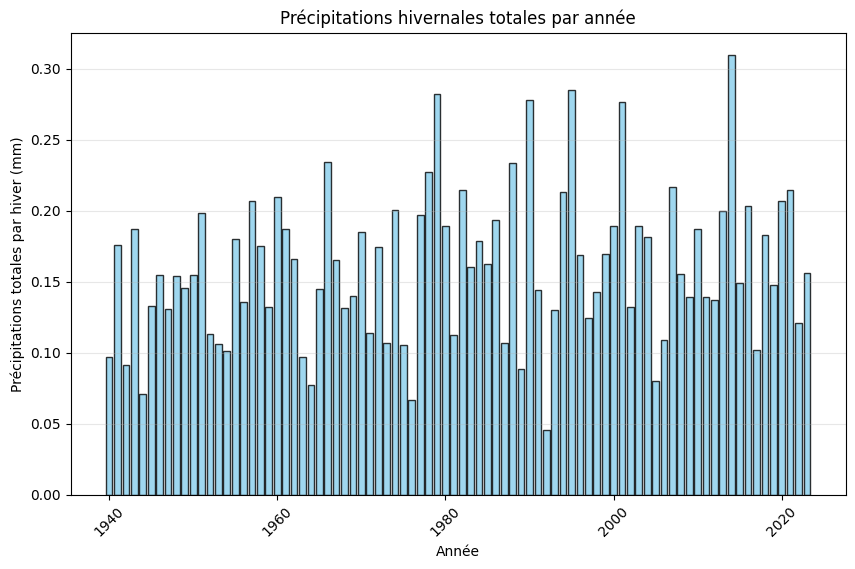

In [105]:
# Histogramme des précipitations par hiver pour chaque année
plt.figure(figsize=(10,6))
plt.bar(WinterPI.year, WinterPI.values, color='skyblue', edgecolor='black', alpha=0.8)
plt.xlabel("Année")
plt.ylabel("Précipitations totales par hiver (mm)")
plt.title("Précipitations hivernales totales par année")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.show()

## GEV sur les maximums hivernaux de précipitation

mu: 0.013033035460726492 sigma: 0.0032826121544676182


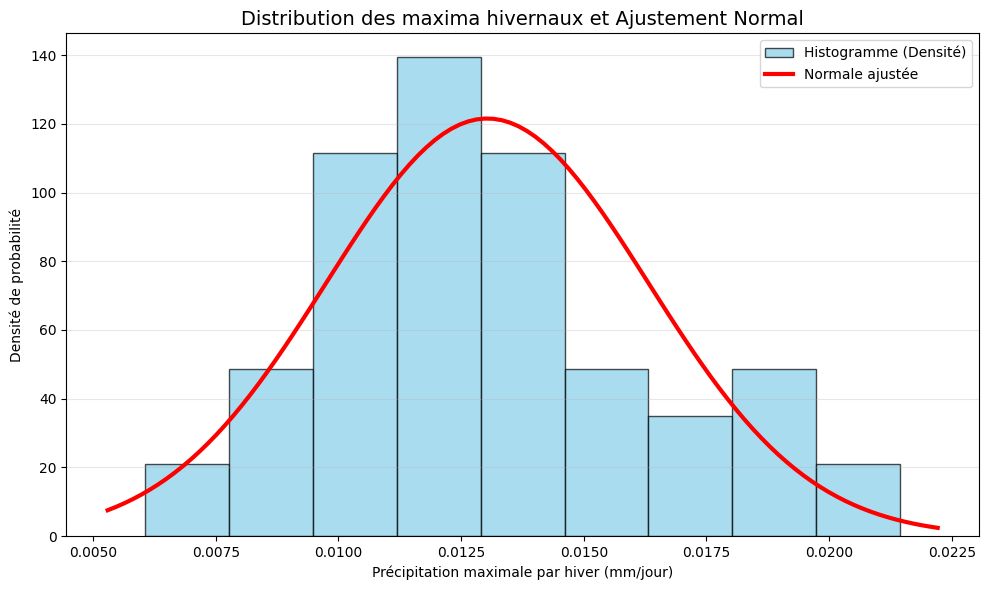

In [107]:
# Tracé de l'histogramme en densité
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (sqrt(N) ici) pour le pas de l'histogramme
bins = int(np.sqrt(len(pr_max_an.values)))

plt.hist(pr_max_an.values, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# Courbe normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)

mu, sigma = norm.fit(pr_max_an.values)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée')
print("mu:", mu, "sigma:", sigma)

# Labels et légende
plt.xlabel("Précipitation maximale par hiver (mm/jour)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des maxima hivernaux et Ajustement Normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paramètres GEV ajustés :
 c (shape) = 0.107, loc1 = 0.01, scale1 = 0.00


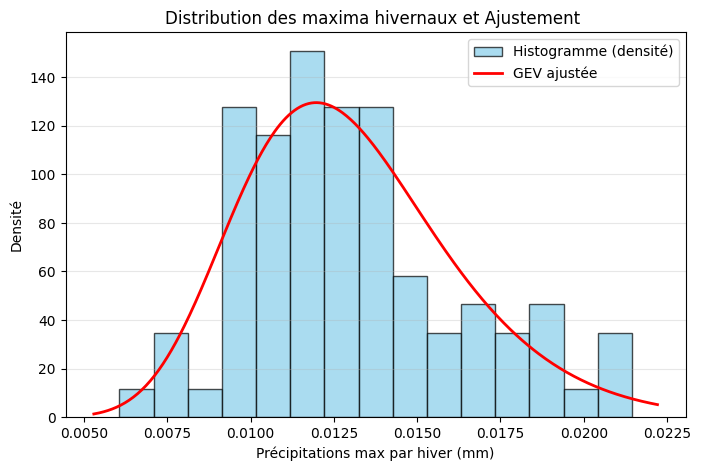

In [109]:
# Ajustement GEV
# genextreme utilise un paramètre c1 (shape), loc1 (location), scale1 (scale)
c1, loc1, scale1 = genextreme.fit(pr_max_an.values)
print(f"Paramètres GEV ajustés :\n c (shape) = {c1:.3f}, loc1 = {loc1:.2f}, scale1 = {scale1:.2f}")

# Histogramme en densité
plt.figure(figsize=(8,5))
plt.hist(pr_max_an.values, bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (densité)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c1, loc1, scale1), 'r-', lw=2, label='GEV ajustée')

# Labels et légende
plt.xlabel("Précipitations max par hiver (mm)")
plt.ylabel("Densité")
plt.title("Distribution des maxima hivernaux et Ajustement ")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()



ξ=c (paramètre de forme ou shape)

μ=loc (paramètre de position ou location)

σ=scale (paramètre d'échelle ou scale)

In [110]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c1, loc1, scale1).cdf(x)

# KS-test
ks_stat, ks_p = kstest(WinterPI.values, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genextreme.logpdf(WinterPI.values, c1, loc1, scale1))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)



Test KS (GEV ajustée) :
  Statistique = 1.0
  p-value     = 0.0
Log-vraisemblance maximale : -inf
AIC = inf


**Raisons du Mauvais Ajustement**

On a trop peu de valeurs

## GEV sur les maximums mensuels de précipitation

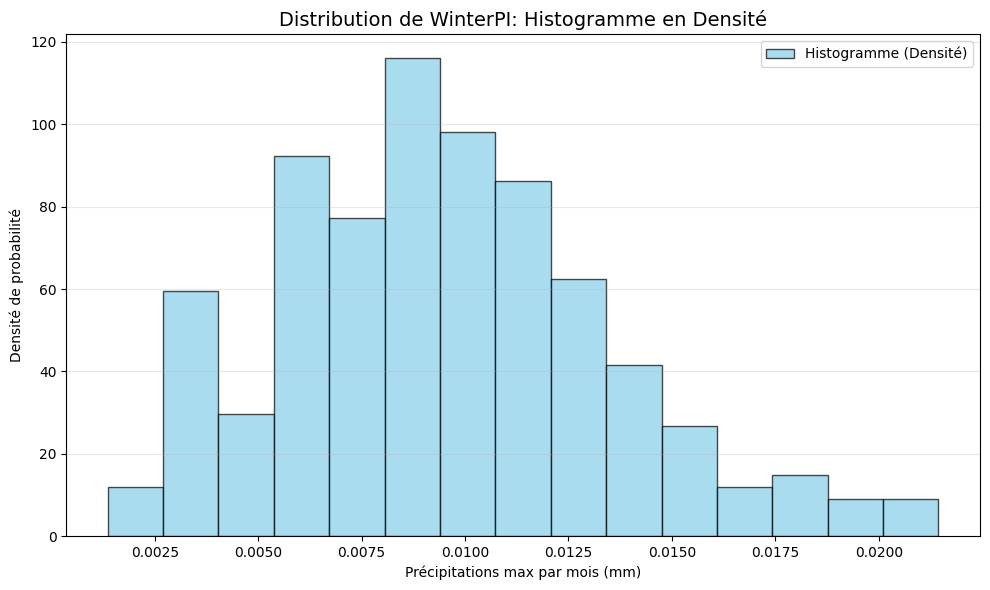

In [112]:
# Tracé de l'histogramme en densité
plt.figure(figsize=(10,6))
# Calculer le nombre de bins (souvent sqrt(N) ou formule de Freedman-Diaconis)
bins = int(np.sqrt(len(pr_max_mois)))

plt.hist(pr_max_mois, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (Densité)')

# Labels et légende
plt.xlabel("Précipitations max par mois (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Distribution de WinterPI: Histogramme en Densité", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Paramètres GEV ajustés :
 c (shape) = 0.132, loc2 = 0.01, scale2 = 0.00


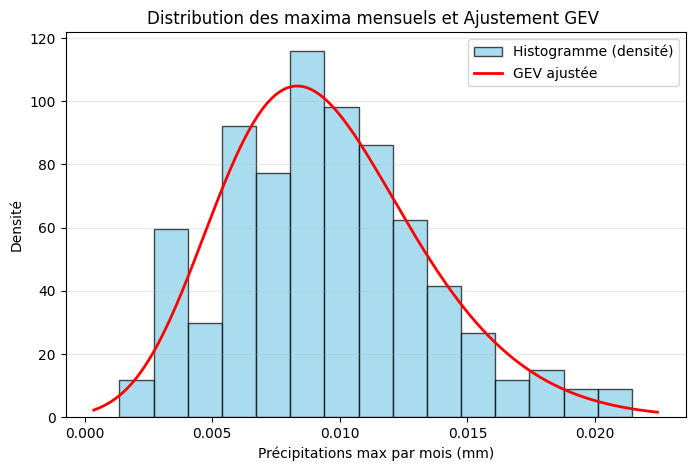

In [113]:
# Ajustement GEV
# genextreme utilise un paramètre c2 (shape), loc2 (location), scale2 (scale)
c2, loc2, scale2 = genextreme.fit(pr_max_mois)
print(f"Paramètres GEV ajustés :\n c (shape) = {c2:.3f}, loc2 = {loc2:.2f}, scale2 = {scale2:.2f}")

# Histogramme en densité
plt.figure(figsize=(8,5))
plt.hist(pr_max_mois.values, bins=15, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (densité)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c2, loc2, scale2), 'r-', lw=2, label='GEV ajustée')

# Labels et légende
plt.xlabel("Précipitations max par mois (mm)")
plt.ylabel("Densité")
plt.title("Distribution des maxima mensuels et Ajustement GEV ")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()


In [114]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c2, loc2, scale2).cdf(x)

# KS-test
ks_stat, ks_p = kstest(pr_max_mois, gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

Test KS (GEV ajustée) :
  Statistique = 0.03276881568964066
  p-value     = 0.9421604294295215


## GPD sur le cumul hivernal de précipitation

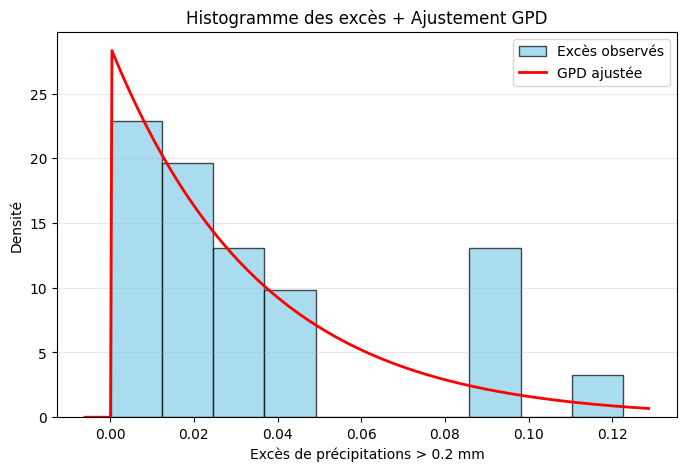

Paramètres GPD : shape(c)=-0.023, loc3=0.0, scale3=0.0


In [121]:

# 1. Choisir un seuil pour les extrêmes
seuil = np.percentile(WinterPI.values, 70)  # 70ème percentile
exceedances_W = WinterPI.values[WinterPI.values > seuil] - seuil  # excès au-dessus du seuil

# 2. Ajuster la GPD aux excès
c3, loc3, scale3 = genpareto.fit(exceedances_W)

# 3. Histogramme des excès (densité)
plt.figure(figsize=(8,5))
plt.hist(exceedances_W, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# 4. Courbe GPD ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c3, loc3, scale3), 'r-', lw=2, label='GPD ajustée')

# 5. Labels et légende
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Affichage des paramètres
print(f"Paramètres GPD : shape(c)={c3:.3f}, loc3={loc3:.1f}, scale3={scale3:.1f}")


In [128]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c3, loc3, scale3).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances_W, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances_W, c3, loc3, scale3))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.12764499809172014
  p-value     = 0.7635847164821384
Log-vraisemblance maximale : 58.79962276624447
AIC = -111.59924553248894


**Remarque**: on a peu de valeurs pourtant on a pris un seuil bas, donc on passe au cumul par mois

## GPD sur le cumul mensuel de précipitation

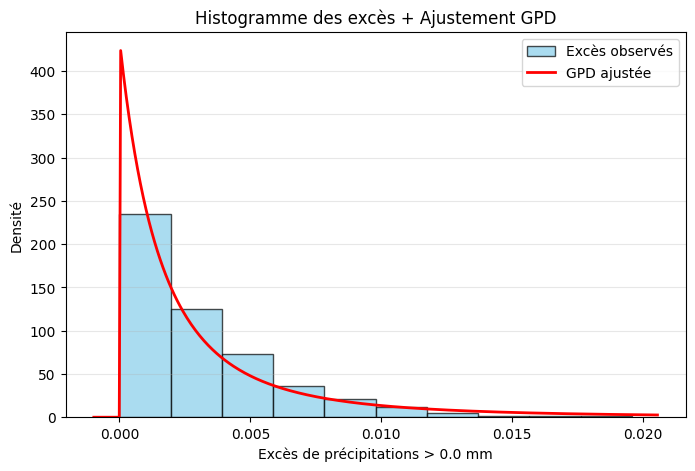

Paramètres GPD : shape(c)=0.491, loc4=0.0, scale4=0.0


In [123]:
# 1. Choisir un seuil pour les extrêmes
seuil = np.percentile(Somme_mois, 70)  # 70ème percentile
exceedances_M = Somme_mois[Somme_mois > seuil] - seuil  # excès au-dessus du seuil

# 2. Ajuster la GPD aux excès
c4, loc4, scale4 = genpareto.fit(exceedances_M)

# 3. Histogramme des excès (densité)
plt.figure(figsize=(8,5))
plt.hist(exceedances_M, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# 4. Courbe GPD ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c4, loc4, scale4), 'r-', lw=2, label='GPD ajustée')

# 5. Labels et légende
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Affichage des paramètres
print(f"Paramètres GPD : shape(c)={c4:.3f}, loc4={loc4:.1f}, scale4={scale4:.1f}")

In [127]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c4, loc4, scale4).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances_M, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances_M, c4, loc4, scale4))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.999488937742231
  p-value     = 0.0
Log-vraisemblance maximale : -inf
AIC = inf


## GPD sur le cumul journalier de précipitation

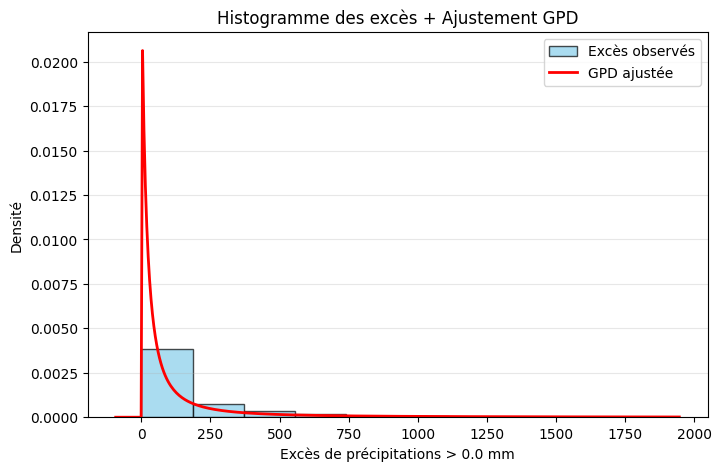

Paramètres GPD : shape(c)=1.230, loc4=0.0, scale4=38.1


In [126]:
# 1. Choisir un seuil pour les extrêmes
seuil = np.percentile(Somme_mois, 70)  # 70ème percentile
exceedances_D = X[X > seuil] - seuil  # excès au-dessus du seuil

# 2. Ajuster la GPD aux excès
c4, loc4, scale4 = genpareto.fit(exceedances_D)

# 3. Histogramme des excès (densité)
plt.figure(figsize=(8,5))
plt.hist(exceedances_D, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# 4. Courbe GPD ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c4, loc4, scale4), 'r-', lw=2, label='GPD ajustée')

# 5. Labels et légende
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Affichage des paramètres
print(f"Paramètres GPD : shape(c)={c4:.3f}, loc4={loc4:.1f}, scale4={scale4:.1f}")

In [129]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c4, loc4, scale4).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances_D, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances_D, c4, loc4, scale4))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.08873321075335616
  p-value     = 8.91081864799395e-51
Log-vraisemblance maximale : -43120.487060278014
AIC = 86246.97412055603


# **Etude des vents (Y)**

## **1. Distribution normale**

Paramètres normale : 6.404704 2.435008
Log-vraisemblance maximale : -17432.108996604413
AIC = 34868.217993208826
Test Shapiro-Wilk :
  statistique = 0.9672969459683689
  p-value     = 2.9708778349767306e-38 

Test KS :
  statistique = 0.05665506752885069
  p-value     = 1.6627855320132638e-21


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7550.
  res = hypotest_fun_out(*samples, **kwds)


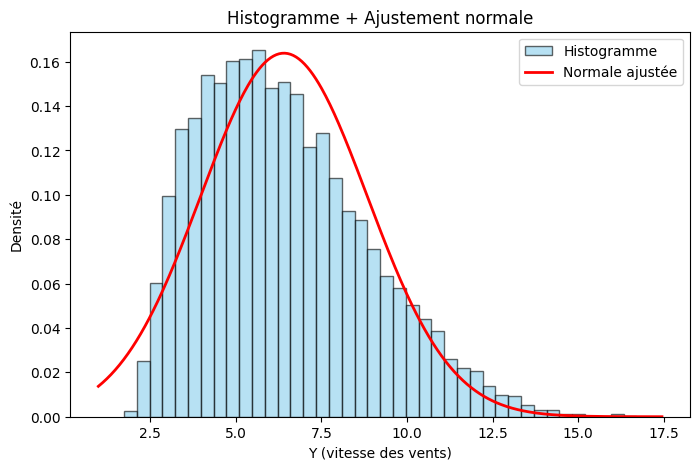

In [37]:
# Pour Y
# Ajustement à la loi normale
mu, sigma = norm.fit(Y)
print("Paramètres normale :", mu, sigma)

# Histogramme + densité normale ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(Y, bins=40, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label="Histogramme")

# Courbe théorique normale ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=2, label="Normale ajustée")

plt.xlabel("Y (vitesse des vents)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement normale")
plt.legend()

# Log-vraisemblance
logL = np.sum(norm.logpdf(Y, mu, sigma))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 2 paramètres : mu, sigma)
AIC_norm = 2*2 - 2*logL
print("AIC =", AIC_norm)

# ------ Shapiro-Wilk ------
shapiro_stat, shapiro_p = shapiro(Y)
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# ------ KS (Kolmogorov-Smirnov) ------
ks_stat, ks_p = kstest(Y, 'norm', args=(mu, sigma))
print("Test KS :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)


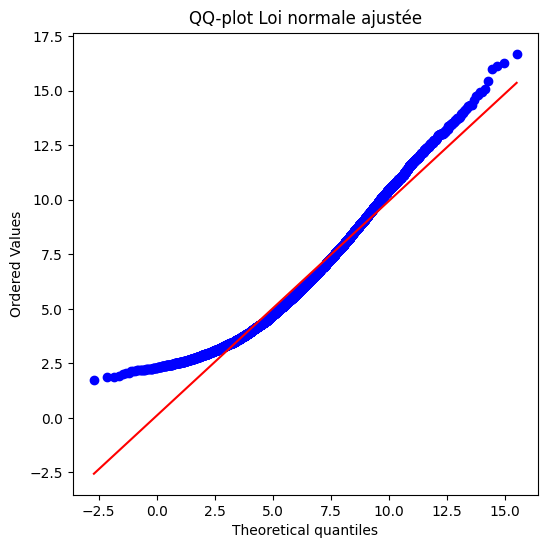

In [38]:
# Diagramme Quantile-Quantile de la noramle
plt.figure(figsize=(6,6))
st.probplot(Y, dist=norm, sparams=(mu, sigma), plot=plt)
plt.title("QQ-plot Loi normale ajustée")
plt.show()

Le QQ-plot montre un écart systématique à la droite, indiquant que la loi normale ne décrit pas correctement la distribution des vitesses de vent.
Les déviations marquées aux extrémités révèlent une asymétrie et des queues mal représentées par le modèle normal.

## **2. Distribution Gamma**

Paramètres gamma : 6.958205547890324 0.9204534
Log-vraisemblance maximale : -17035.4769465387
AIC = 34074.9538930774
Test KS :
  statistique = 0.025747807063877387
  p-value     = 8.821439167836713e-05


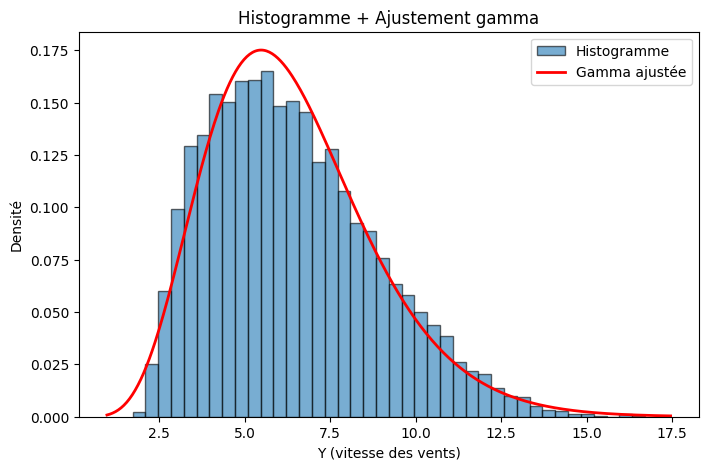

In [134]:
# Garder uniquement les valeurs strictement positives
Y_pos = Y[Y > 0]

# Ajustement à la loi Gamma
alpha, loc, scale_gamma = gamma.fit(Y_pos, floc=0)
print("Paramètres gamma :", alpha, beta)

# Histogramme + densité gamma ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(Y_pos, bins=40, density=True, alpha=0.6,
         edgecolor='black', label="Histogramme")

# Log-vraisemblance
logL_gamma = np.sum(gamma.logpdf(Y_pos, alpha, loc=0, scale=beta))
print("Log-vraisemblance maximale :", logL_gamma)

# AIC (k = 2 paramètres : alpha, beta)
AIC_gamma = 2*2 - 2*logL_gamma
print("AIC =", AIC_gamma)

# KS (Kolmogorov-Smirnov)
ks_stat, ks_p = kstest(Y_pos, 'gamma', args=(alpha, 0, beta))
print("Test KS :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)

# Courbe théorique gamma ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, gamma.pdf(xx, alpha, loc=0, scale=beta),
         'r-', lw=2, label="Gamma ajustée")

plt.xlabel("Y (vitesse des vents)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement gamma")
plt.legend()
plt.show()

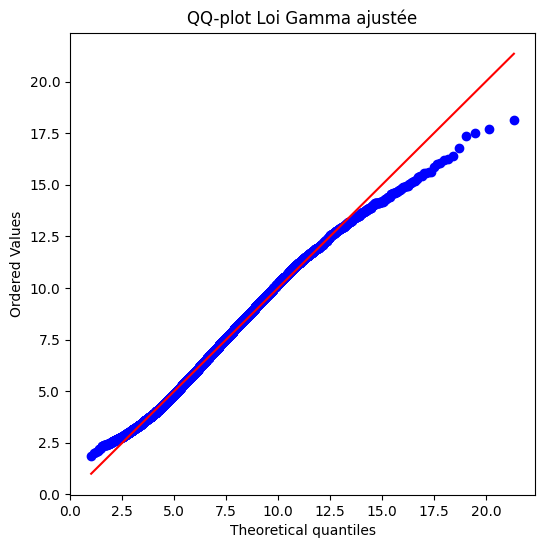

In [135]:
# Diagramme Quantile-Quantile de la loi Gamma
plt.figure(figsize=(6,6))

# Données standardisées (enlever scale)
Y_std = Y_pos / beta

st.probplot(Y_std, dist=gamma, sparams=(alpha,), plot=plt)

plt.title("QQ-plot Loi Gamma ajustée")
plt.show()

Le QQ-plot montre un bon alignement des quantiles centraux, indiquant que la loi Gamma décrit correctement la distribution des vitesses de vent.
Les écarts observés dans la queue droite suggèrent toutefois une légère sous-estimation des valeurs de vent les plus élevées.

## **3. Distribution Beta**

Paramètres beta : 2.5998714817204203 8.020162750398065 1.7112824615289306 19.179872124456743
Log-vraisemblance maximale : -16938.48245874719
AIC = 33880.96491749438
Test KS :
  statistique = 0.012781828090994984
  p-value     = 0.1681412946975085


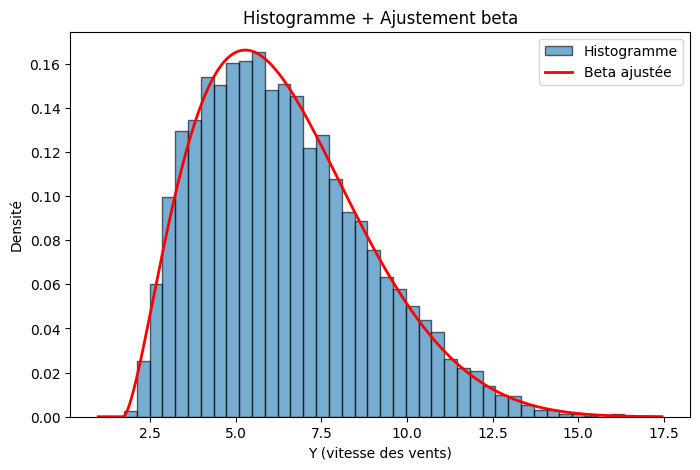

In [138]:
# Ajustement à la loi Beta
a, b, loc, scale = beta_dist.fit(Y)
print("Paramètres beta :", a, b, loc, scale)

# Histogramme + densité beta ajustée
plt.figure(figsize=(8,5))

# Histogramme
plt.hist(Y, bins=40, density=True, alpha=0.6,
         edgecolor='black', label="Histogramme")

# Log-vraisemblance
logL_beta = np.sum(beta.logpdf(Y, a, b, loc=loc, scale=scale))
print("Log-vraisemblance maximale :", logL_beta)

# AIC (k = 2 paramètres : a, b)
AIC_beta = 2*2 - 2*logL_beta
print("AIC =", AIC_beta)

# KS (Kolmogorov–Smirnov)
ks_stat, ks_p = kstest(Y, 'beta', args=(a, b, loc, scale))
print("Test KS :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)

# Courbe théorique beta ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, beta.pdf(xx, a, b, loc=loc, scale=scale),
         'r-', lw=2, label="Beta ajustée")

plt.xlabel("Y (vitesse des vents)")
plt.ylabel("Densité")
plt.title("Histogramme + Ajustement beta")
plt.legend()
plt.show()

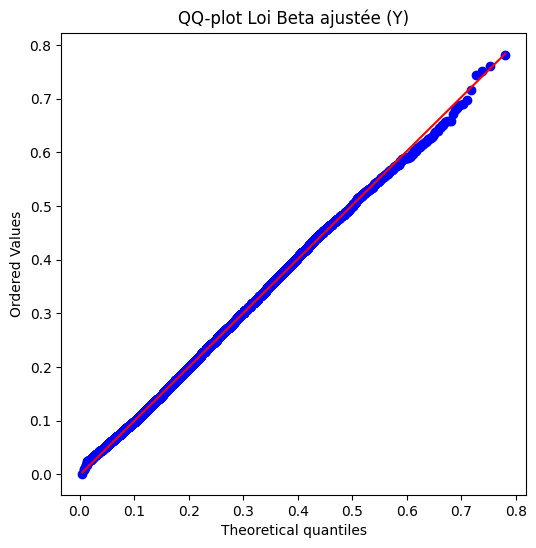

In [139]:
# Recentrer / re-scaler Y pour revenir sur [0,1]
Y_std = (Y - loc) / scale

# QQ-plot Beta avec probplot
plt.figure(figsize=(6,6))
st.probplot(Y_std, dist=beta_dist, sparams=(a, b), plot=plt)
plt.title("QQ-plot Loi Beta ajustée (Y)")
plt.show()

Le QQ-plot montre un très bon alignement sur l’ensemble des quantiles, indiquant que la loi Beta ajustée décrit bien la distribution des vitesses de vent.
Les légers écarts en queue droite restent faibles et suggèrent un ajustement globalement satisfaisant, meilleur que celui de la loi normale.

## **4. GPD pour Y: moyenne de vent journalière**

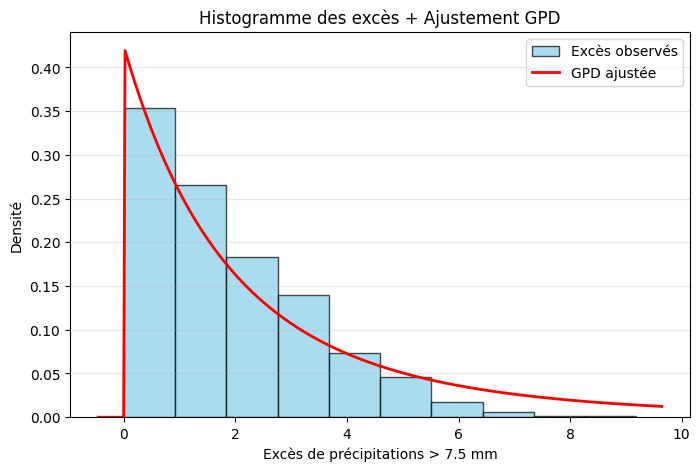

Paramètres GPD : shape(c)=0.237, loc5=10.6, scale5=2.4


In [165]:
# 1. Choisir un seuil pour les extrêmes
seuil = np.percentile(Y, 70)  # 70ème percentile
exceedances_YD = Y[Y > seuil] - seuil  # excès au-dessus du seuil

# 2. Ajuster la GPD aux excès
c5, loc5, scale5 = genpareto.fit(exceedances_YD)

# 3. Histogramme des excès (densité)
plt.figure(figsize=(8,5))
plt.hist(exceedances_YD, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# 4. Courbe GPD ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc5, scale5), 'r-', lw=2, label='GPD ajustée')

# 5. Labels et légende
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Affichage des paramètres
print(f"Paramètres GPD : shape(c)={c:.3f}, loc5={loc:.1f}, scale5={scale5:.1f}")

In [166]:
# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c5, loc5, scale5).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances_YD, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances_YD, c5, loc5, scale5))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

Test KS (GPD ajustée) :
  Statistique = 0.014511216902931279
  p-value     = 0.7210619929371442
Log-vraisemblance maximale : -3666.465515029594
AIC = 7338.931030059188


# **Etude des queues de distribution pour les vents**

# Définition des variables:

In [149]:
# Grouper par année et par mois
Y_max = Y.groupby('time.year').map(lambda x: x.groupby('time.month').max(dim='time'))
print(Y_max.sizes)
print(Y_max.sizes)
print(Y_max.shape)
print(len(Y_max['year']))
print(len(Y_max['month']))

# Transformer en numpy array (shape = nb_annees × 3)
Y_max_values = np.array([x.values for x in Y_max])
print("Shape avant flatten :", Y_max_values.shape)

# Transformer en vecteur 1D (flatten)
Y_max_month = Y_max_values.flatten()
print("Shape après flatten :", Y_max_month.shape)

# Affichage
print(Y_max_month)
print(len(Y_max_month))


Frozen({'year': 84, 'month': 3})
Frozen({'year': 84, 'month': 3})
(84, 3)
84
3
Shape avant flatten : (84, 3)
Shape après flatten : (252,)
[ 7.83476019 10.09995174 11.20478725 11.36468315 13.50259209 11.81658554
 12.40323544  8.05217934  9.75095367 14.13482189 10.60959911 11.50073338
 10.40312099  9.174263   11.91625309 11.89690304 11.68322372 11.62458229
 12.69151115 12.29220486 11.75441837  8.58282757  7.65015554 11.08776093
 11.05125523  9.63924217 11.00717258 13.68508339 12.07698059  9.69643879
  7.81553125 12.58375168 10.14964485 11.85835171 14.196702   13.02904987
 12.18385696  9.53630257 11.44875908 10.08596992 12.15663052  7.80696297
 10.04051399 10.71097279 11.79619408 12.22029114 11.93211174 12.85323143
  9.89169025  9.5182848  10.98441601  9.88213634 11.21700287 10.84153938
 11.98259163 11.10270596 10.94130802 12.62800503  8.33229256 12.30474567
 11.94175243  9.79757881 11.62707233 11.61027718 11.22255135 11.81040096
 13.01651192 11.28274059 10.92477703 10.21255302  9.2666616

In [153]:
# Création d’un identifiant année–mois (YYYYMM) pour chaque date
year_month = xr.DataArray(
    ds_djf['time'].dt.year * 100 + ds_djf['time'].dt.month,
    coords={'time': ds_djf['time']},
    dims='time'
)

# Regroupement des moyenness de vitesse de vent par mois (année–mois)
Y_moy_mois = Y.groupby(year_month)

print(Y_moy_mois)        # affiche l’objet groupby
print(len(Y_moy_mois))   # nombre de mois DJF distincts


<DataArrayGroupBy, grouped over 1 grouper(s), 251 groups in total:
    'group': UniqueGrouper('group'), 251/251 groups with labels 194001, 194002, ..., 202302>
251


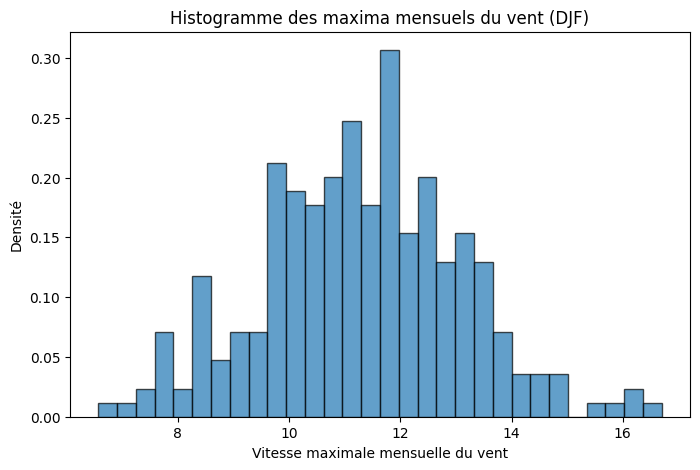

In [154]:
# Histogramme des maxima mensuels du vent (DJF)
plt.figure(figsize=(8,5))

plt.hist(Y_max_month, bins=30, density=True,
         edgecolor='black', alpha=0.7)

plt.xlabel("Vitesse maximale mensuelle du vent")
plt.ylabel("Densité")
plt.title("Histogramme des maxima mensuels du vent (DJF)")
plt.show()


#Normale max mensuel

Test Shapiro-Wilk :
  statistique = 0.9950057249226881
  p-value     = 0.5878888963541303 

Test KS (paramètres estimés) :
  statistique = 0.02855004464111699
  p-value     = 0.983136726462895


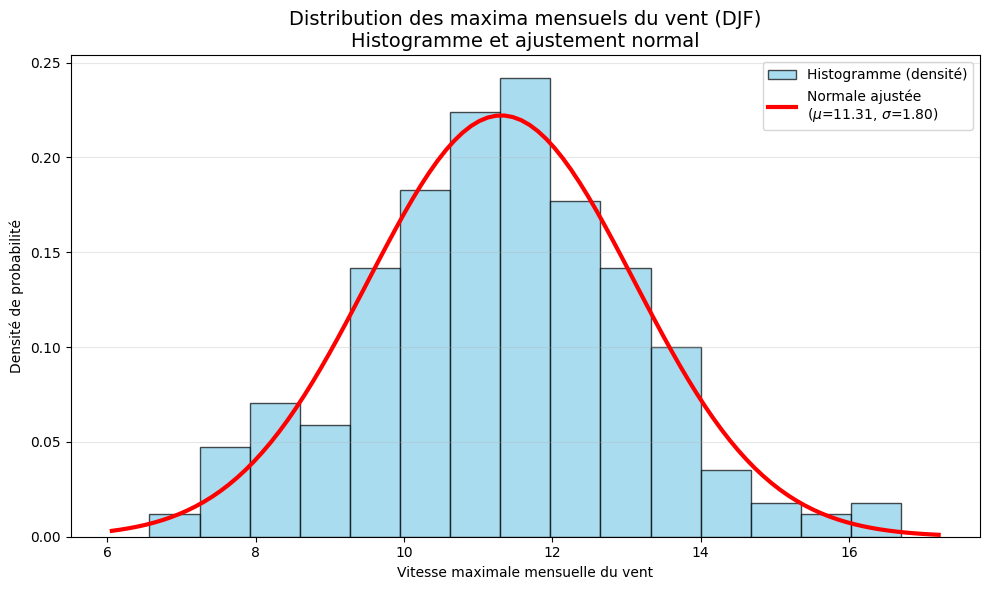

In [157]:
# Tracé de l'histogramme en densité des maxima mensuels du vent
plt.figure(figsize=(10,6))

# Nombre de bins
bins = int(np.sqrt(len(Y_max_month[:-1])))

plt.hist(Y_max_month[:-1], bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7,
         label='Histogramme (densité)')

# Ajustement à la loi normale
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 100)
mu, sigma = norm.fit(Y_max_month[:-1])

plt.plot(xx, norm.pdf(xx, mu, sigma), 'r-', lw=3,
         label=f'Normale ajustée\n($\\mu$={mu:.2f}, $\\sigma$={sigma:.2f})')

# Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(Y_max_month[:-1])
print("Test Shapiro-Wilk :")
print("  statistique =", shapiro_stat)
print("  p-value     =", shapiro_p, "\n")

# KS (Kolmogorov-Smirnov)
ks_stat, ks_p = kstest(Y_max_month[:-1], 'norm', args=(mu, sigma))
print("Test KS (paramètres estimés) :")
print("  statistique =", ks_stat)
print("  p-value     =", ks_p)

# Labels et mise en forme
plt.xlabel("Vitesse maximale mensuelle du vent")
plt.ylabel("Densité de probabilité")
plt.title("Distribution des maxima mensuels du vent (DJF)\nHistogramme et ajustement normal", fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Gamma et Beta pour max vent mensuel

 Gamma 
alpha = 38.53056105516239
scale = 0.29353467240329695
KS p-value = 0.5917011772478967

 Beta 
a = 634.3975525612534  b = 35958931.88711533
loc = -33.93949899833544  scale = 2564856.427909836
KS p-value = 0.9293628882975067


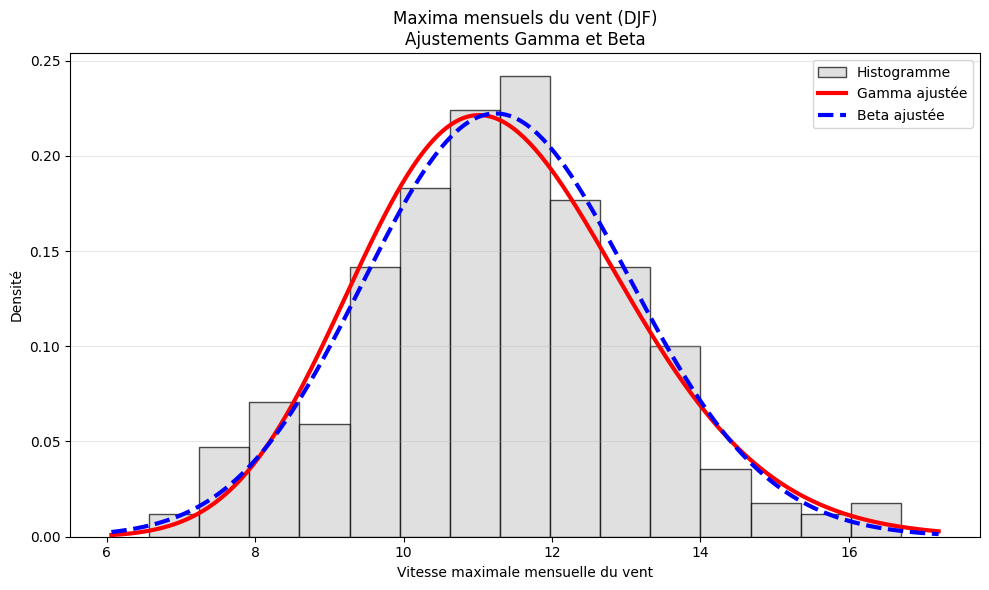

In [159]:
# Données : maxima mensuels du vent
Z = Y_max_month[:-1]   # on enlève la dernière si besoin

# Histogramme
plt.figure(figsize=(10,6))
bins = int(np.sqrt(len(Z)))

plt.hist(Z, bins=bins, density=True,
         color='lightgrey', edgecolor='black', alpha=0.7,
         label='Histogramme')

xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 300)

# GAMMA
Z_pos = Z[Z > 0]                           # Gamma → valeurs positives
alpha, loc_g, scale_g = gamma.fit(Z_pos, floc=0)

plt.plot(xx, gamma.pdf(xx, alpha, loc=0, scale=scale_g),
         'r-', lw=3, label='Gamma ajustée')

# p-value KS Gamma
ks_g, p_g = kstest(Z_pos, 'gamma', args=(alpha, 0, scale_g))

# BETA
a, b, loc_b, scale_b = beta_dist.fit(Z)

plt.plot(xx, beta_dist.pdf(xx, a, b, loc=loc_b, scale=scale_b),
         'b--', lw=3, label='Beta ajustée')

# p-value KS Beta
ks_b, p_b = kstest(Z, 'beta', args=(a, b, loc_b, scale_b))

# Résultats statistiques
print(" Gamma ")
print("alpha =", alpha)
print("scale =", scale_g)
print("KS p-value =", p_g)

print("\n Beta ")
print("a =", a, " b =", b)
print("loc =", loc_b, " scale =", scale_b)
print("KS p-value =", p_b)
# Plot final
plt.xlabel("Vitesse maximale mensuelle du vent")
plt.ylabel("Densité")
plt.title("Maxima mensuels du vent (DJF)\nAjustements Gamma et Beta")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#GEV max vent mensuel

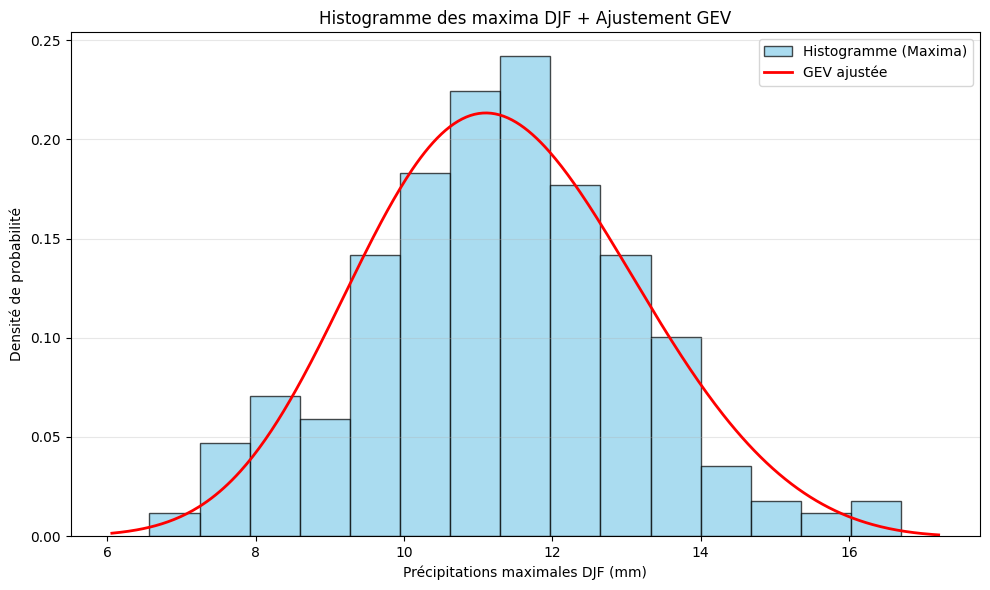

Paramètres GEV : shape(c)=0.237, loc=10.6, scale=1.8


In [161]:
# Ajustement GEV
c, loc, scale = genextreme.fit(Y_max_month[:-1])

# Histogramme des maxima
plt.figure(figsize=(10,6))
bins = int(np.sqrt(len(Y_max_month[:-1])))
plt.hist(Y_max_month[:-1], bins=bins, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogramme (Maxima)')

# Courbe GEV ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genextreme.pdf(xx, c, loc=loc, scale=scale), 'r-', lw=2, label='GEV ajustée')

plt.xlabel("Précipitations maximales DJF (mm)")
plt.ylabel("Densité de probabilité")
plt.title("Histogramme des maxima DJF + Ajustement GEV")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Paramètres GEV
print(f"Paramètres GEV : shape(c)={c:.3f}, loc={loc:.1f}, scale={scale:.1f}")


In [162]:
# Construction de la CDF paramétrée
gev_cdf = lambda x: genextreme(c, loc=loc, scale=scale).cdf(x)

# KS-test
ks_stat, ks_p = kstest(Y_max_month[:-1], gev_cdf)

print("Test KS (GEV ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

Test KS (GEV ajustée) :
  Statistique = 0.03539598142003553
  p-value     = 0.9003669148262775


# GPD sur les moyennes de vent mensuelles

In [168]:
# Moyenne par mois (année–mois)
Y_moy_mois_val = Y.groupby(year_month).mean()

# Maintenant c’est un DataArray 1D
print(Y_moy_mois_val.shape)

(251,)


Test KS (GPD ajustée) :
  Statistique = 0.07107265530461698
  p-value     = 0.8171108104114385
Log-vraisemblance maximale : -50.62185970813113
AIC = 107.24371941626227


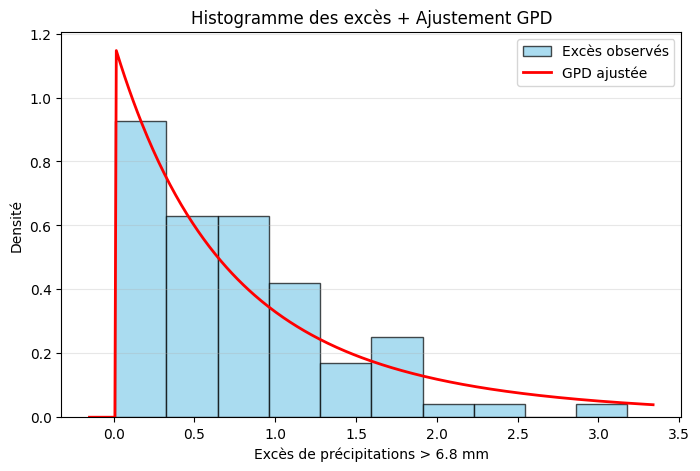

Paramètres GPD : shape(c)=0.237, loc5=10.6, scale5=0.9


In [170]:
# 1. Choisir un seuil pour les extrêmes
seuil = np.percentile(Y_moy_mois_val, 70)  # 70ème percentile
exceedances_YM = Y_moy_mois_val[Y_moy_mois_val > seuil] - seuil  # excès au-dessus du seuil

# 2. Ajuster la GPD aux excès
c5, loc5, scale5 = genpareto.fit(exceedances_YM)

# 3. Histogramme des excès (densité)
plt.figure(figsize=(8,5))
plt.hist(exceedances_YM, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Excès observés')

# 4. Courbe GPD ajustée
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 400)
plt.plot(xx, genpareto.pdf(xx, c, loc5, scale5), 'r-', lw=2, label='GPD ajustée')

# Construction de la  paramétrée
gpd_cdf = lambda x: genpareto(c5, loc5, scale5).cdf(x)

# KS-test
ks_stat, ks_p = kstest(exceedances_YM, gpd_cdf)

print("Test KS (GPD ajustée) :")
print("  Statistique =", ks_stat)
print("  p-value     =", ks_p)

# Log-vraisemblance
logL = np.sum(genpareto.logpdf(exceedances_YM, c5, loc5, scale5))
print("Log-vraisemblance maximale :", logL)

# AIC = 2k - 2 logL pour la normale (k = 3)
AIC_norm = 2*3 - 2*logL
print("AIC =", AIC_norm)

# 5. Labels et légende
plt.xlabel(f"Excès de précipitations > {seuil:.1f} mm")
plt.ylabel("Densité")
plt.title("Histogramme des excès + Ajustement GPD")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

# 6. Affichage des paramètres
print(f"Paramètres GPD : shape(c)={c:.3f}, loc5={loc:.1f}, scale5={scale5:.1f}")